In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

#### Set pathes to datasets


In [3]:
animals_dir = "data/animals"
ner_dir = "data/ner"

#### Showing images of animals dataset

In my opinion, this dataset is not good, but it’s better than collecting it from scratch (I couldn’t find a better one)

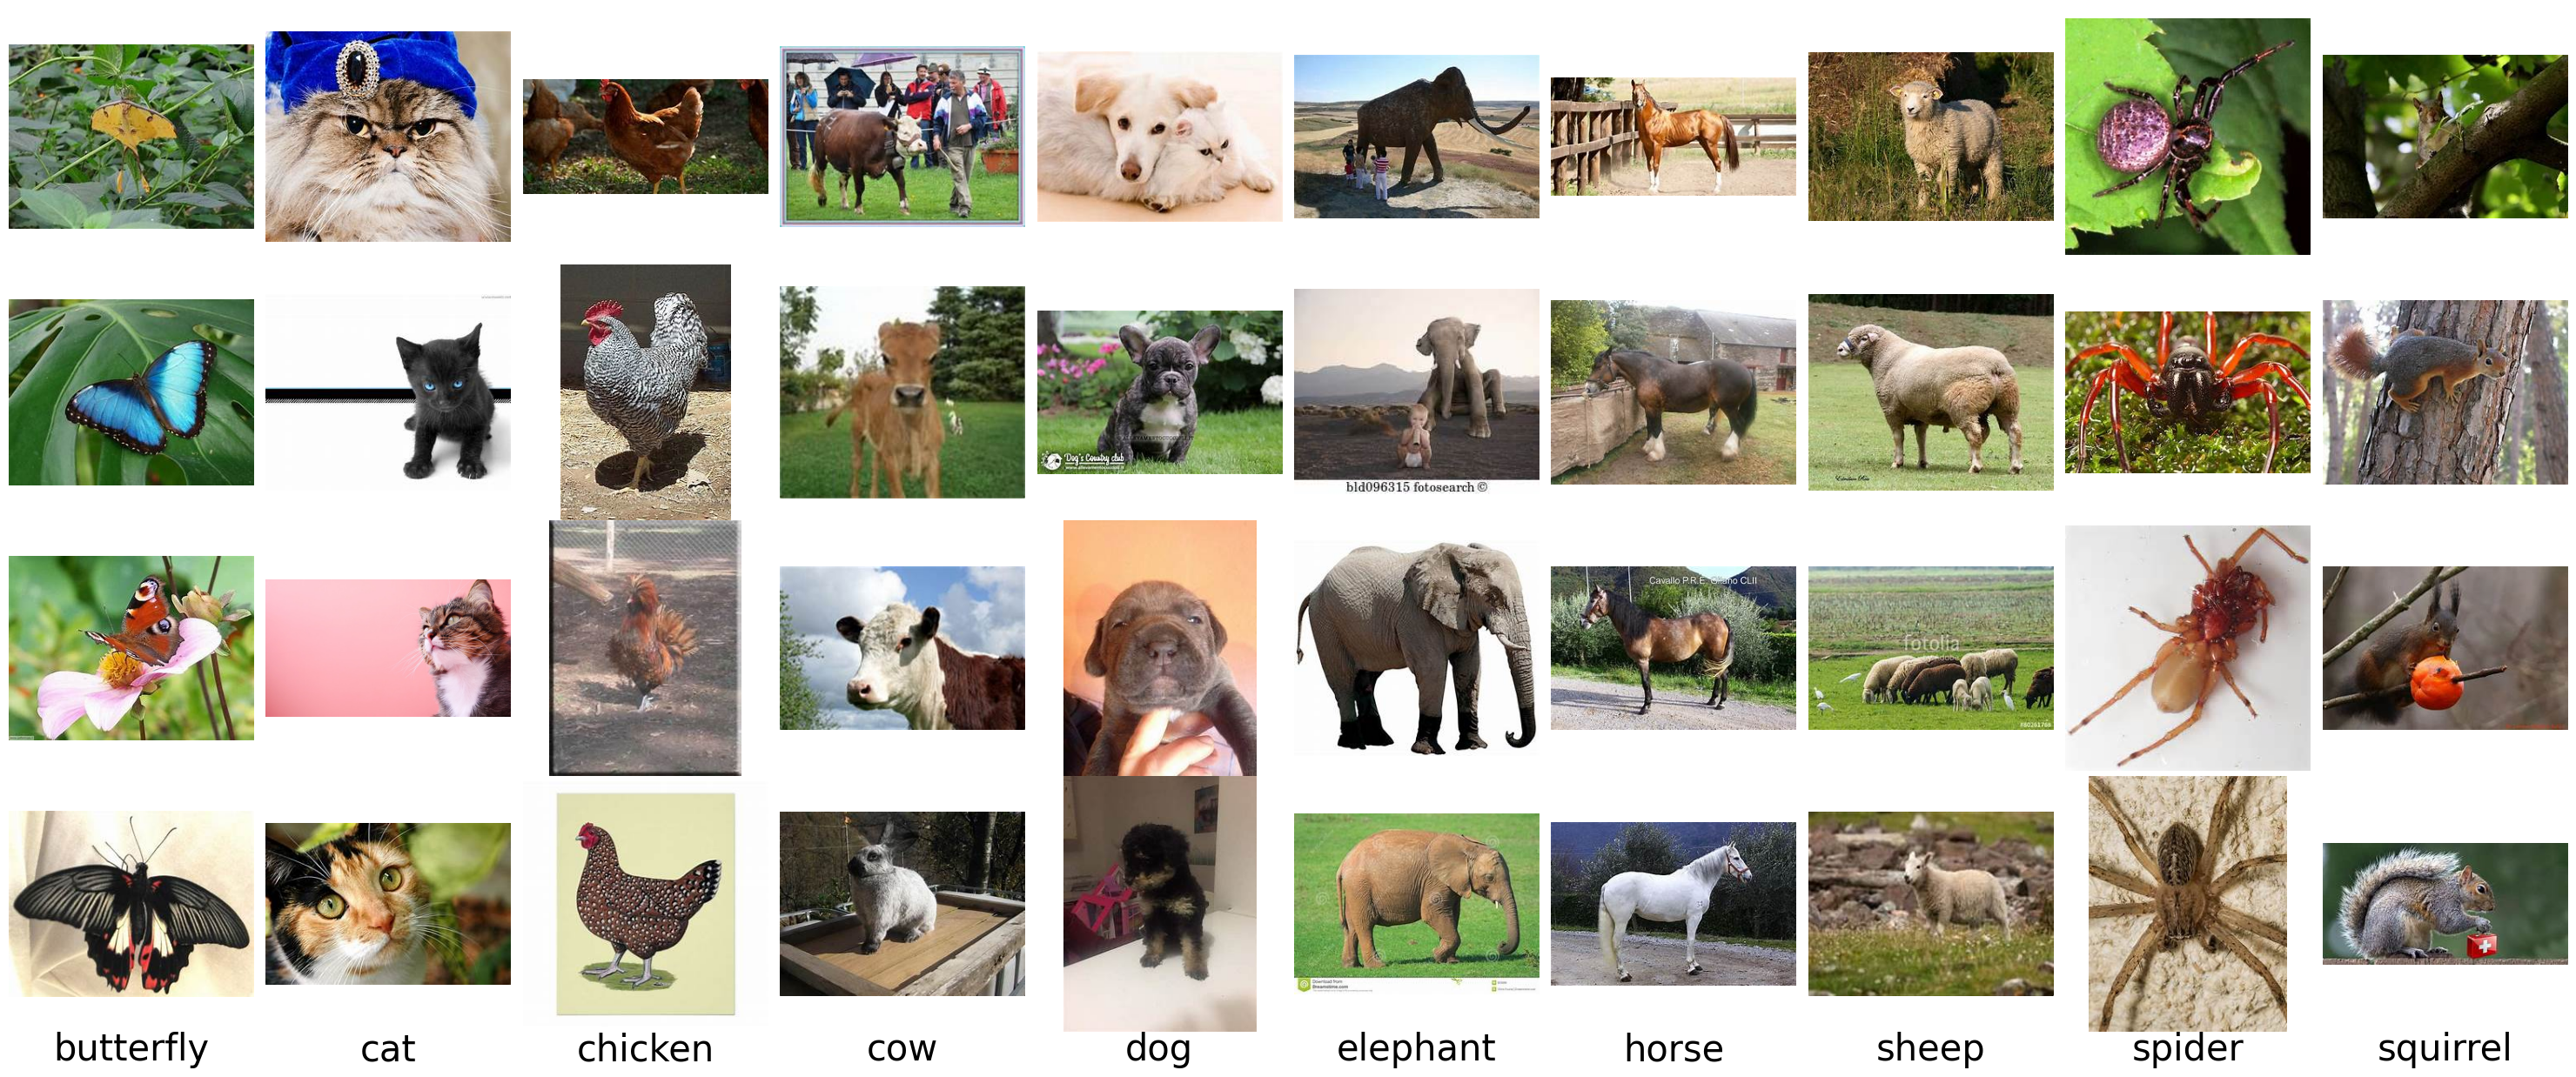

In [4]:
animal_folders = [name for name in os.listdir(animals_dir) if os.path.isdir(os.path.join(animals_dir, name))]
images = {}
for animal in animal_folders:
    animal_path = os.path.join(animals_dir, animal)
    photos = [f for f in os.listdir(animal_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
   
    if photos:
        selected_photos = random.sample(photos, min(4, len(photos)))
        images[animal] = [os.path.join(animal_path, photo) for photo in selected_photos]

num_animals = len(images)
max_photos_per_animal = max([len(paths) for paths in images.values()])

fig = plt.figure(figsize=(num_animals * 3, max_photos_per_animal * 3))

plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01, hspace=0, wspace=0.05)

current_col = 0

for animal, img_paths in images.items():
    title_ax = fig.add_subplot(1, num_animals, current_col + 1)
    title_ax.text(0.5, 0, animal, ha='center', va='top', fontsize=30)
    title_ax.axis('off')
    
    for i, img_path in enumerate(img_paths):
        img_ax = fig.add_subplot(max_photos_per_animal, num_animals, 
                                current_col + 1 + i * num_animals)
        img = mpimg.imread(img_path)
        img_ax.imshow(img)
        img_ax.axis('off')
    
    current_col += 1

plt.show()

#### Display class distribution

Found 10 animal classes: butterfly, cat, chicken, cow, dog, elephant, horse, sheep, spider, squirrel


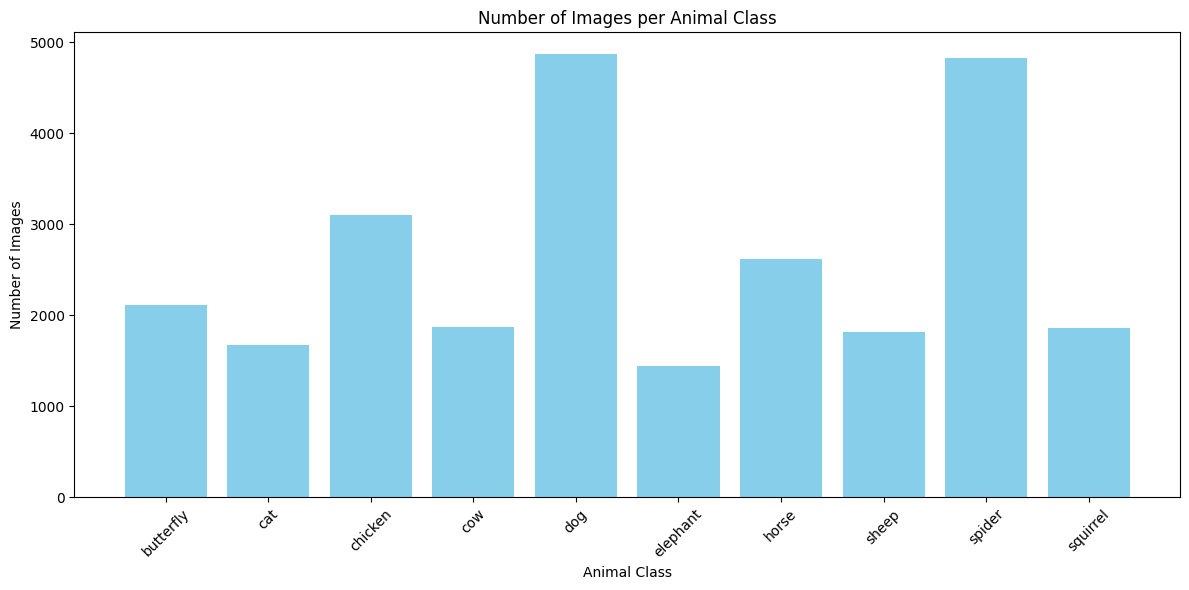

In [5]:

animal_folders = [name for name in os.listdir(animals_dir) if os.path.isdir(os.path.join(animals_dir, name))]
print(f"Found {len(animal_folders)} animal classes: {', '.join(animal_folders)}")

dataset_stats = {}

for animal in animal_folders:
    animal_path = os.path.join(animals_dir, animal)
    photos = [f for f in os.listdir(animal_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    dataset_stats[animal] = len(photos)

plt.figure(figsize=(12, 6))
plt.bar(dataset_stats.keys(), dataset_stats.values(), color='skyblue')
plt.title('Number of Images per Animal Class')
plt.xlabel('Animal Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Color analyze of each class

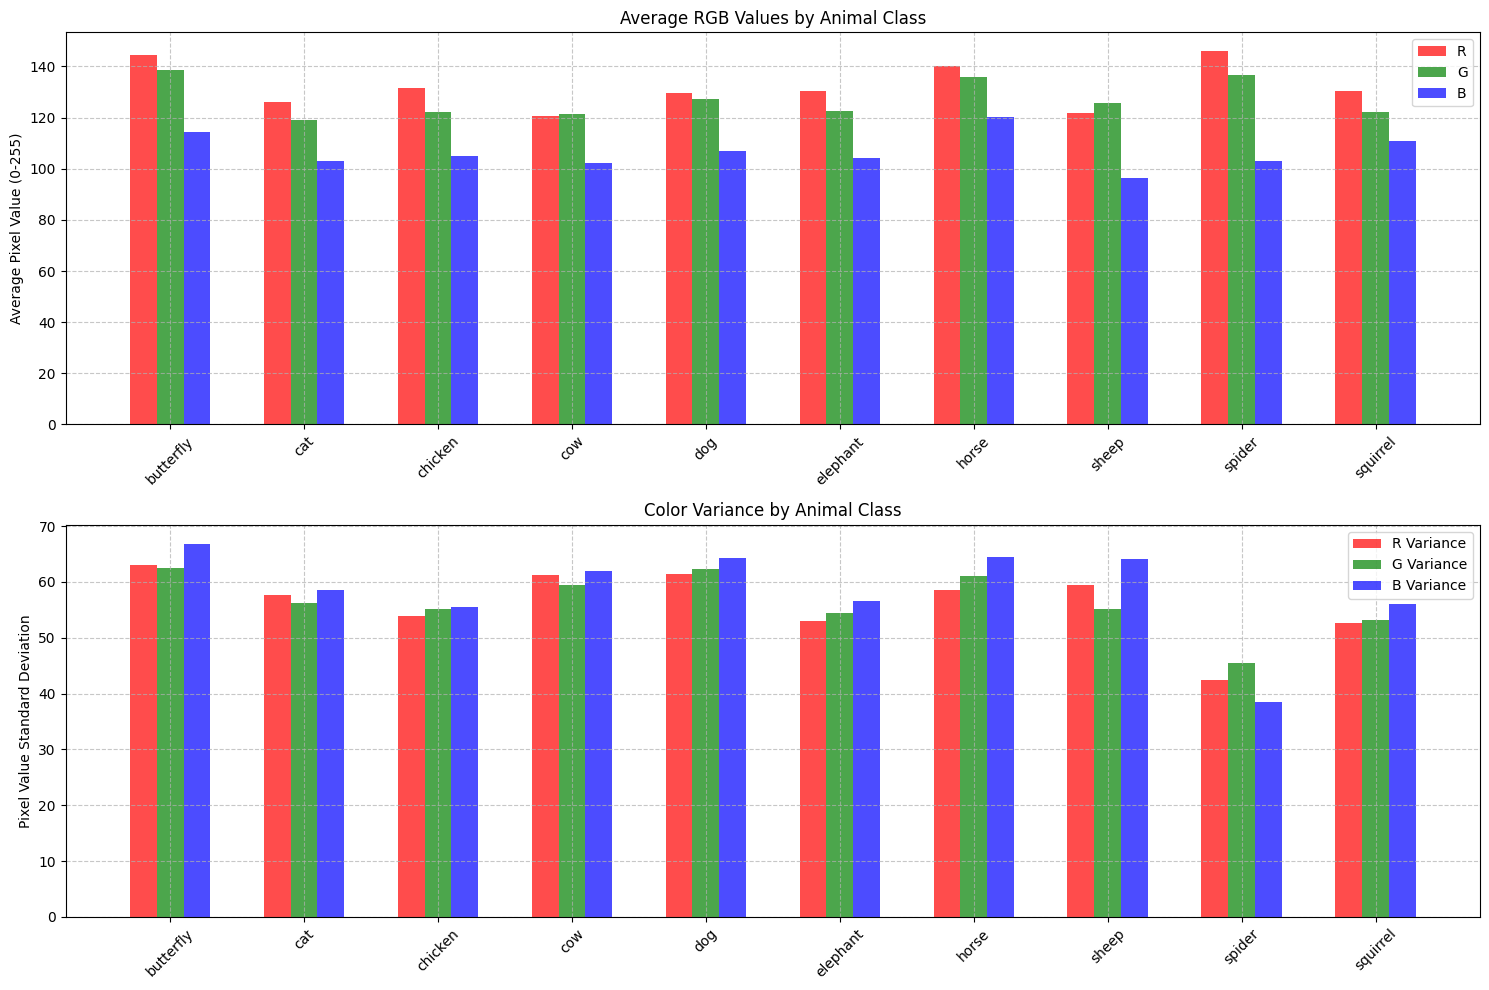

In [6]:
def analyze_colors(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    pixels = img.reshape(-1, 3)
    
    avg_color = np.mean(pixels, axis=0)
    
    color_variance = np.std(pixels, axis=0)
    
    return avg_color, color_variance

# Analyze color distribution per class
color_data = {}
variance_data = {}

for animal in animal_folders:
    animal_path = os.path.join(animals_dir, animal)
    photos = [f for f in os.listdir(animal_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    sample_size = min(len(photos), 20)
    sampled_photos = random.sample(photos, sample_size) if len(photos) > sample_size else photos
    
    avg_colors = []
    color_variances = []
    
    for photo in sampled_photos:
        img_path = os.path.join(animal_path, photo)
        try:
            avg_color, color_var = analyze_colors(img_path)
            avg_colors.append(avg_color)
            color_variances.append(color_var)
        except Exception as e:
            print(f"Error analyzing colors in {img_path}: {e}")
    
    if avg_colors:
        color_data[animal] = np.mean(avg_colors, axis=0)
        variance_data[animal] = np.mean(color_variances, axis=0)

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
x = range(len(color_data))
width = 0.2
  
plt.bar([i - width for i in x], [color_data[animal][0] for animal in animal_folders], 
        width=width, color='r', alpha=0.7, label='R')
plt.bar(x, [color_data[animal][1] for animal in animal_folders], 
        width=width, color='g', alpha=0.7, label='G')
plt.bar([i + width for i in x], [color_data[animal][2] for animal in animal_folders], 
        width=width, color='b', alpha=0.7, label='B')

plt.xticks(x, animal_folders, rotation=45)
plt.ylabel('Average Pixel Value (0-255)')
plt.title('Average RGB Values by Animal Class')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(2, 1, 2)
plt.bar([i - width for i in x], [variance_data[animal][0] for animal in animal_folders], 
        width=width, color='r', alpha=0.7, label='R Variance')
plt.bar(x, [variance_data[animal][1] for animal in animal_folders], 
        width=width, color='g', alpha=0.7, label='G Variance')
plt.bar([i + width for i in x], [variance_data[animal][2] for animal in animal_folders], 
        width=width, color='b', alpha=0.7, label='B Variance')

plt.xticks(x, animal_folders, rotation=45)
plt.ylabel('Pixel Value Standard Deviation')
plt.title('Color Variance by Animal Class')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()